# P058 数据聚类-使用numpy自己实现聚类

In [3]:
import numpy as np
import pandas as pd
from numpy.linalg import norm
import random

In [7]:
np.random.seed(42)

In [9]:
df = pd.read_csv("./p058.csv")

In [11]:
df

,x1,x2
0,2.594675,-3.266358
1,1.865450,-3.762144
2,1.299272,-3.166188
3,0.781896,1.714512
4,-0.733158,2.714493
5,2.479724,-2.412872
6,-0.548970,-0.278338
7,5.260191,-3.784969
8,1.594294,2.331512
9,1.376120,2.920965


In [15]:
x1_min = df.x1.min()
x1_max = df.x1.max()

x2_min = df.x2.min()
x2_max = df.x2.max()

In [17]:
x1_min, x1_max, x2_min, x2_max

(-1.541495, 5.260191, -4.201629, 4.805962)

In [19]:
random.uniform(x1_min, x1_max)

0.6420305535275859

In [23]:
centroid_1 = np.array([random.uniform(x1_min, x1_max), random.uniform(x2_min, x2_max)])
centroid_2 = np.array([random.uniform(x1_min, x1_max), random.uniform(x2_min, x2_max)])

In [25]:
centroid_1, centroid_2

(array([-0.46338917,  2.12803539]), array([4.20445123, 4.57600406]))

In [27]:
data = df.values
data

array([[ 2.594675, -3.266358],
       [ 1.86545 , -3.762144],
       [ 1.299272, -3.166188],
       [ 0.781896,  1.714512],
       [-0.733158,  2.714493],
       [ 2.479724, -2.412872],
       [-0.54897 , -0.278338],
       [ 5.260191, -3.784969],
       [ 1.594294,  2.331512],
       [ 1.37612 ,  2.920965],
       [-0.513263,  3.674438],
       [ 1.428438,  2.653099],
       [ 3.082621, -2.231656],
       [-0.595741,  3.431074],
       [ 1.021407,  2.584693],
       [ 0.935124,  4.341219],
       [ 1.402682, -4.070644],
       [ 1.161893,  2.881046],
       [ 0.634636,  1.489924],
       [ 0.98114 ,  4.805962],
       [ 0.977953,  1.768433],
       [ 4.088926, -2.906827],
       [ 3.513604, -2.924726],
       [ 2.164466, -2.282778],
       [ 0.2184  ,  3.155238],
       [ 4.771012, -3.128966],
       [ 2.921052, -2.353398],
       [ 3.555052, -3.6634  ],
       [ 1.97293 , -2.683122],
       [ 0.809331, -3.996001],
       [-0.982497,  3.08491 ],
       [-1.541495, -0.039335],
       [

In [43]:
for i in range(10):
    clusters = []
    for point in data:
        centroid_1_dist = norm(centroid_1 - point)
        centroid_2_dist = norm(centroid_2 - point)
        cluster = 1 if centroid_1_dist < centroid_2_dist else 2
        clusters.append(cluster)
    df["cluster"] = clusters

    centroid_1 = [round(df[df.cluster == 1].x1.mean(), 3), round(df[df.cluster == 1].x1.mean(), 3)]
    centroid_2 = [round(df[df.cluster == 2].x1.mean(), 3), round(df[df.cluster == 2].x1.mean(), 3)]


In [47]:
centroid_1, centroid_2

([1.76, 1.76], [0.919, 0.919])

# P059 数据聚类-KMeans实现聚类

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [199]:
np.random.seed(42)

In [201]:
df = pd.read_csv("./p059.csv")

In [203]:
df

,x1,x2
0,0.046981,0.562969
1,0.614167,-2.038125
2,7.122156,5.857660
3,-4.457440,-5.074446
4,0.717542,-1.211016
...,...,...
295,5.280992,5.950424
296,-3.461963,-5.815810
297,5.515035,6.277665
298,-0.275052,0.018418


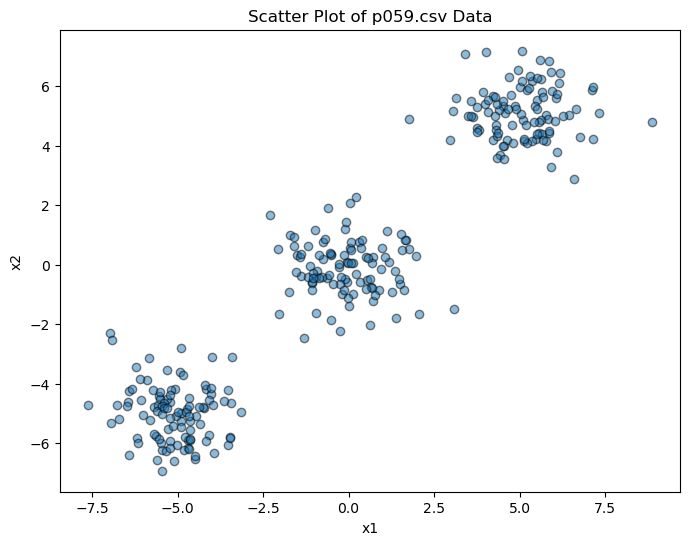

In [205]:
# Load the dataset
df = pd.read_csv("p059.csv")

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(df["x1"], df["x2"], alpha=0.5, edgecolors='k')

# Add labels and title
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter Plot of p059.csv Data")

# Show the plot
plt.show()


In [207]:
kmeans = KMeans(
    n_clusters=3,
    max_iter=100,
    random_state=42
)

In [209]:
kmeans.fit(df)

KMeans(max_iter=100, n_clusters=3, random_state=42)

In [211]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[-5.10384652, -4.97769541],
       [ 5.06489625,  5.10684012],
       [-0.05600447, -0.1153056 ]])

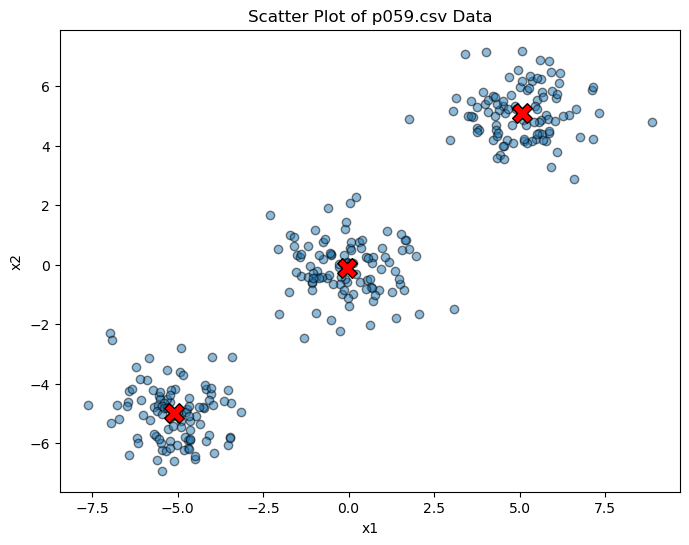

In [213]:
# Load the dataset
df = pd.read_csv("p059.csv")

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(df["x1"], df["x2"], alpha=0.5, edgecolors='k')

# Plot the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], 
            c='red', marker='X', s=200, edgecolors='k', label="Cluster Centers")


# Add labels and title
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter Plot of p059.csv Data")

# Show the plot
plt.show()


# P060 数据聚类-使用KMeans模型实现预估

In [215]:
df.head()

,x1,x2
0,0.046981,0.562969
1,0.614167,-2.038125
2,7.122156,5.857660
3,-4.457440,-5.074446
4,0.717542,-1.211016


In [217]:
kmeans

KMeans(max_iter=100, n_clusters=3, random_state=42)

In [219]:
y_kmeans = kmeans.predict(df)

In [177]:
y_kmeans

array([2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 1, 0, 2, 2, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0,
       0, 2, 0, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 1, 0, 1, 0,
       1, 2, 0, 2, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 2, 1, 2, 1,
       2, 2, 2, 0, 1, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2,
       1, 0, 2, 1, 2, 0, 2, 2, 1, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2,
       0, 2, 0, 1, 0, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 2, 0, 0, 2, 1, 0,
       1, 2, 2, 1, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2,
       1, 0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 1, 2, 1, 2, 2, 0, 0, 1, 1, 2, 1, 1, 0, 0, 2, 2, 0, 1, 2, 1, 2,
       1, 1, 1, 0, 0, 2, 1, 2, 0, 1, 0, 1, 2, 1], d

In [221]:
df["y_kmeans"] = y_kmeans

In [223]:
df

,x1,x2,y_kmeans
0,0.046981,0.562969,2
1,0.614167,-2.038125,2
2,7.122156,5.857660,1
3,-4.457440,-5.074446,0
4,0.717542,-1.211016,2
...,...,...,...
295,5.280992,5.950424,1
296,-3.461963,-5.815810,0
297,5.515035,6.277665,1
298,-0.275052,0.018418,2


# P061 数据聚类-评价指标WCSS

In [226]:
# 聚类的评价指标：
# WCSS（Within-Cluster Sum-of-Squared）
# 样本距离最近的聚类中心的距离总和

# 获取方法：kmeans.inertia_

# 问题：将n_clusters设置为2-9，收集不同聚类模型的inertia，存入Python的列表中

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [230]:
np.random.seed(42)

In [252]:
df = pd.read_csv("./p061.csv")

In [254]:
df

,x1,x2
0,-8.509858,-11.437523
1,-10.414793,-10.556977
2,-8.056934,-13.319005
3,-5.430910,-13.588620
4,-10.702460,-7.562423
...,...,...
295,0.142196,-1.530049
296,-2.581240,-0.809625
297,-1.153667,-2.936291
298,3.018878,-1.332880


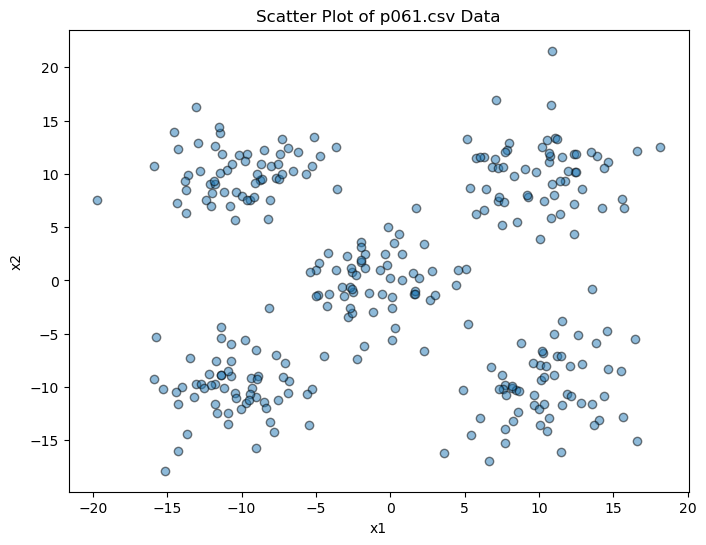

In [256]:
# Load the dataset

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(df["x1"], df["x2"], alpha=0.5, edgecolors='k')

# Add labels and title
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter Plot of p061.csv Data")

# Show the plot
plt.show()

In [258]:
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(round(kmeans.inertia_, 2))

In [260]:
wcss

[33162.57, 20370.74, 10162.08, 4969.38, 4666.41, 4194.39, 3975.3, 3497.38]

# P062 数据聚类-肘部法则选择聚类数目

In [269]:
# K-Means是一个聚类方法，问题是，有时候我们拿到的数据根本不知道要分为几类
# 肘部法则（Elbow Method）
# Elbow是手肘的意思，该方法适用于K值相对较小的情况。当选择的k值小于真正的K时，k每增加1，cost值就会大幅地减小；
# 当选择的k值大于真正的K时，k每增加1，cost值的变化就不会那么明显。这样，正确的k值就会在这个转折点，蕾丝elbow的地方
# 如果肘点点位置不明显，这时候就无法确定K值了

In [271]:
import matplotlib.pyplot as plt

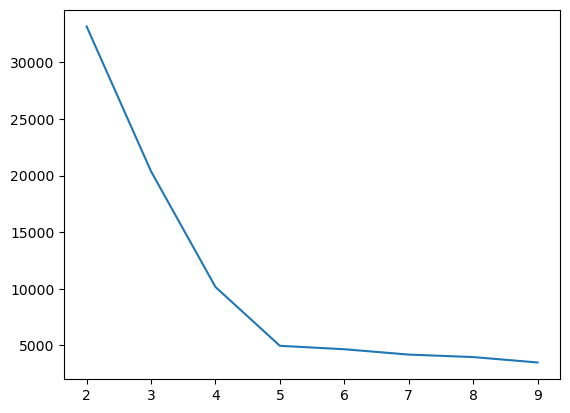

In [273]:
plt.plot(
    list(range(2, 10)),
    wcss
)

# P063 数据聚类-层次聚类Agglomerative

In [276]:
# Agglomerative Clustering从N个簇开始，每个簇最初只包含一个对象，然后在每个步骤中合并两个最相似的簇，直到形成一个包含所有数据的簇
# 如果我们在扔河给定的高度砍树，我们会得到一个给定大小的集群。

In [317]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

In [319]:
df = pd.read_csv("./p063.csv")

In [321]:
df

,x1,x2
0,9.520184,11.688908
1,14.653456,3.885626
2,12.241881,7.042822
3,-8.372320,-8.030339
4,8.422735,6.366951
...,...,...
295,11.238794,15.061425
296,-5.385890,-15.601796
297,-4.341442,-6.199267
298,16.182244,10.055255


In [323]:
cluster = AgglomerativeClustering(n_clusters=2)

In [325]:
cluster.fit_predict(df)

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [327]:
df["cluster"] = cluster.labels_

In [329]:
df

,x1,x2,cluster
0,9.520184,11.688908,0
1,14.653456,3.885626,0
2,12.241881,7.042822,0
3,-8.372320,-8.030339,1
4,8.422735,6.366951,0
...,...,...,...
295,11.238794,15.061425,0
296,-5.385890,-15.601796,1
297,-4.341442,-6.199267,1
298,16.182244,10.055255,0


# P064 数据聚类-层次聚类的重要属性 

In [331]:
# 问题：如何计算聚类簇之间的距离
# 参数：
# linkage：一个字符串，用于指定链接算法
# ward：单链接single-linkage，两个簇的样本对之间距离的最小值
# complete： 全链接complete-linkage算法，两个簇的样本对之间距离的最大值
# average：均链接average-linkage算法，两个簇的样本对之间距离的平均值

# 参数affinity：字符串，用于计算距离
# 可以为：euclidean, |1, |2, mantattan, cosine, precomputed

In [333]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

In [335]:
df = pd.read_csv("./p063.csv")

In [337]:
df

,x1,x2
0,9.520184,11.688908
1,14.653456,3.885626
2,12.241881,7.042822
3,-8.372320,-8.030339
4,8.422735,6.366951
...,...,...
295,11.238794,15.061425
296,-5.385890,-15.601796
297,-4.341442,-6.199267
298,16.182244,10.055255


In [339]:
cluster = AgglomerativeClustering(
    n_clusters=2,
    linkage = "complete",
    metric = "manhattan"
)

In [341]:
cluster.fit_predict(df)

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0])

In [343]:
df = pd.DataFrame(df, columns=['x1','x2'])
df['cluster'] = cluster.labels_

In [345]:
df

,x1,x2,cluster
0,9.520184,11.688908,1
1,14.653456,3.885626,1
2,12.241881,7.042822,1
3,-8.372320,-8.030339,0
4,8.422735,6.366951,1
...,...,...,...
295,11.238794,15.061425,1
296,-5.385890,-15.601796,0
297,-4.341442,-6.199267,0
298,16.182244,10.055255,1


# P065 数据聚类-DBSCAN聚类算法

In [ ]:
# DBSCAN基于密度的噪声应用空间聚类
# 英文全称为Density-based spatial clustering of applications with noise

In [350]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN

In [352]:
df = pd.read_csv("./p065.csv")

In [354]:
df

,x1,x2
0,-8.509858,-11.437523
1,-10.414793,-10.556977
2,-8.056934,-13.319005
3,-5.430910,-13.588620
4,-10.702460,-7.562423
...,...,...
295,0.142196,-1.530049
296,-2.581240,-0.809625
297,-1.153667,-2.936291
298,3.018878,-1.332880


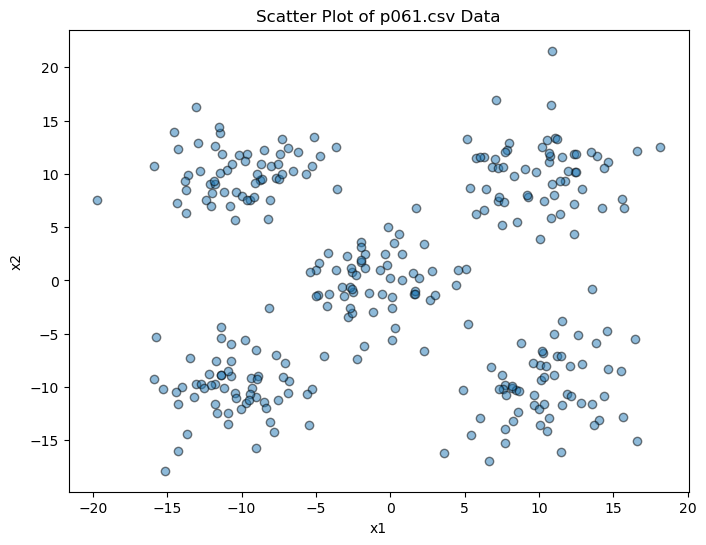

In [387]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("p065.csv")

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(df["x1"], df["x2"], alpha=0.5, edgecolors='k')

# Add labels and title
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter Plot of p061.csv Data")

# Show the plot
plt.show()


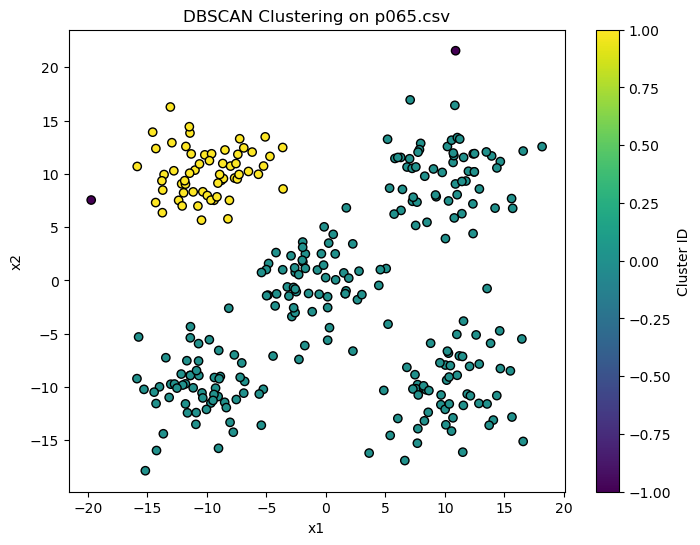

In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("p065.csv")

# Normalize data for better DBSCAN performance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters if needed
clusters = dbscan.fit_predict(data_scaled)

# Add cluster labels to DataFrame
df["cluster"] = clusters

# Plot the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df["x1"], df["x2"], c=df["cluster"], cmap="viridis", edgecolors='k')

# Add labels and title
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("DBSCAN Clustering on p065.csv")

# Add colorbar for clusters
plt.colorbar(scatter, label="Cluster ID")

# Show the plot
plt.show()


In [419]:
df["cluster"] = dbscan.labels_

In [421]:
df

,x1,x2,cluster
0,-8.509858,-11.437523,0
1,-10.414793,-10.556977,0
2,-8.056934,-13.319005,0
3,-5.430910,-13.588620,0
4,-10.702460,-7.562423,0
...,...,...,...
295,0.142196,-1.530049,0
296,-2.581240,-0.809625,0
297,-1.153667,-2.936291,0
298,3.018878,-1.332880,0


In [423]:
df["cluster"].value_counts()

cluster
 0    239
 1     59
-1      2
Name: count, dtype: int64

# P066 数据聚类-DBSCAN聚类算法的异常点

In [427]:
# 参考上面那段代码的最后一段：
# df["cluster"].value_counts()

In [405]:
df = pd.read_csv("./p065.csv")
df

,x1,x2
0,-8.509858,-11.437523
1,-10.414793,-10.556977
2,-8.056934,-13.319005
3,-5.430910,-13.588620
4,-10.702460,-7.562423
...,...,...
295,0.142196,-1.530049
296,-2.581240,-0.809625
297,-1.153667,-2.936291
298,3.018878,-1.332880


In [407]:
cluster = DBSCAN(
    eps=0.6, 
    min_samples=7
)

In [409]:
cluster.fit(df)

DBSCAN(eps=0.6, min_samples=7)

In [411]:
df["cluster"] = cluster.labels_

In [381]:
df

,x1,x2,cluster
0,-8.509858,-11.437523,-1
1,-10.414793,-10.556977,-1
2,-8.056934,-13.319005,-1
3,-5.430910,-13.588620,-1
4,-10.702460,-7.562423,-1
...,...,...,...
295,0.142196,-1.530049,-1
296,-2.581240,-0.809625,-1
297,-1.153667,-2.936291,-1
298,3.018878,-1.332880,-1


In [415]:
df["cluster"].value_counts()

cluster
-1    300
Name: count, dtype: int64